In [17]:
import pandas as pd
import pyfpgrowth
train_data=pd.read_csv('train.csv')
TID_grouped=train_data.groupby(train_data['user_id'])
TID=[]
user_list=[]
for i in TID_grouped:
    user_list.append(i[0])
    tmp_set=list(i[1]['cate_id'])
    TID.append(list(set(tmp_set)))


In [19]:
class TreeNode:
    def __init__(self,name,count=1,children=[],linknode=None,parent_node=None):
        self.name=name
        self.count=count
        self.children=children
        self.linknode=linknode
        self.parent_node=parent_node
    
    def have_element(self,target):
        for i in range(len(self.children)):
            if self.children[i].name==target:
                return [i,True]
        return [-1,False]

items={}
for tid in TID:
    for item in tid:
        if item not in items.keys():
            items[item]=1
        else:
            items[item]+=1
items=dict(sorted(items.items(),key = lambda x:x[1],reverse=True))
selected_items={}
count=0
for i in items.keys():
    if items[i]>1000:
        selected_items[i]=items[i]
deleted_items=set(items)-set(selected_items)
#删除非频繁项
selected_TID=[]
for tid in TID:
    processed_items=list(set(tid)-deleted_items)
    processed_items=sorted(processed_items)
    selected_TID.append(processed_items)
#构建FP树 
pre_node={}
#初始化
for i in selected_items:
    pre_node[i]=None
root=TreeNode('root')  # 根节点
for tid in selected_TID:
    cur_node=root
    for item in tid:
        [idx,exsit]=cur_node.have_element(item)
        if exsit==True:
            cur_node.children[idx].count+=1
            cur_node=cur_node.children[idx]
#             print('1, %s' % cur_node.name)
#             print('计数为:%d' % root.children[0].count)
        else:
            node=TreeNode(item,1,[],None,cur_node)
            if pre_node[item] is not None:
                pre_node[item].linknode=node
                pre_node[item]=node
            else:
                pre_node[item]=node
            cur_node.children.append(node)
            cur_node=node
#             print('2, %s' % cur_node.name)

# 挖掘关联规则
patterns=pyfpgrowth.find_frequent_patterns(selected_TID,1000)
rules=pyfpgrowth.generate_association_rules(patterns,0.7)
rules=dict(sorted(rules.items(),key=lambda x:x[1][1],reverse=True))
selected_TID
for key in rules.keys():
    value=rules[key][0]
    confidence=rules[key][1]
    print('%s -> %s confidence:%f' % (key,value,confidence))

('1_11', '1_17', '1_2', '1_3', '1_6') -> ('1_1',) confidence:0.940978
('1_1', '1_11', '1_17', '1_2', '1_3') -> ('1_6',) confidence:0.936242
('1_11', '1_17', '1_2', '1_6') -> ('1_1',) confidence:0.935504
('1_10', '1_17', '1_6') -> ('1_1',) confidence:0.935145
('1_2', '1_3', '1_5', '1_6') -> ('1_1',) confidence:0.933780
('1_10', '1_2', '1_6') -> ('1_1',) confidence:0.932093
('1_11', '1_17', '1_5', '1_6') -> ('1_1',) confidence:0.931003
('1_1', '1_17', '1_23', '1_3') -> ('1_6',) confidence:0.930665
('1_17', '1_2', '1_3', '1_6') -> ('1_1',) confidence:0.928365
('1_1', '1_14', '1_17') -> ('1_6',) confidence:0.926471
('1_2', '1_5', '1_6') -> ('1_1',) confidence:0.923570
('1_1', '1_17', '1_2', '1_3') -> ('1_6',) confidence:0.923482
('1_17', '1_2', '1_6') -> ('1_1',) confidence:0.921617
('1_2', '1_23', '1_3', '1_6') -> ('1_1',) confidence:0.921569
('1_17', '1_23', '1_3', '1_6') -> ('1_1',) confidence:0.921444
('1_11', '1_2', '1_3', '1_6') -> ('1_1',) confidence:0.920370
('1_6', '1_7') -> ('1_1

In [20]:
# 匹配
def match(user_cate_list,rules):
    for conditon,result in rules.items():
        conditon=list(conditon)
        if set(conditon)-set(user_cate_lista)==set():
            return result[0]

candidate=pd.read_csv('candidate.txt',header=None)




# 评价指标

In [21]:
import math
user_TID_article={}    # 用户感兴趣的文章
for tid in TID_grouped:
    df_tid=tid[1]
    tmp_article=df_tid[~df_tid['action_type'].isin(['view'])]['item_id']
    user_TID_article[tid[0]]=list(tmp_article)

In [22]:
C={}
N={}
for user,items in user_TID_article.items():
    for item in items:
        if item not in N.keys():
            N[item]=0
        N[item]+=1
        for item2 in items:
            if item==item2:
                continue
            if item not in C.keys():
                C[item]={}
            if item2 not in C[item].keys():
#                 C[user].update({user2:0})
                C[item][item2]=0
            C[item][item2]+=1
w={}
for item,item2_item in C.items():
    for item2,val in item2_item.items():
        if item not in w.keys():
            w[item]={}
        if item2 not in w[item].keys():
            w[item][item2]=0
        w[item][item2]=val / math.sqrt(N[item]*N[item2])
for item,item2_item in w.items():
    w[item]=dict(sorted(item2_item.items(),key=lambda x:x[1],reverse=True))


KeyboardInterrupt: 

In [8]:
w_keys=list(w.keys())
new_articles=pd.read_csv('news_info.csv')
news_id=list(new_articles['item_id'])
def  recommand(user,N,user_article,w):
    browsed_article=user_article[user]
    similar_rank={}
    for article in browsed_article:
        if article not in w_keys:
            continue
        tmp_similar_rank=w[article]
        tmp_article_list=list(tmp_similar_rank.keys())

        choosed_num=min(N,len(tmp_article_list))
        for i in range(choosed_num):
            if tmp_article_list[i] not in news_id:
                continue
            if tmp_article_list[i] not in similar_rank.keys():
                similar_rank[tmp_article_list[i]]=tmp_similar_rank[tmp_article_list[i]]
            else:
                if similar_rank[tmp_article_list[i]]<tmp_similar_rank[tmp_article_list[i]]:
                    similar_rank[tmp_article_list[i]]=tmp_similar_rank[tmp_article_list[i]]
    similar_rank=dict(sorted(similar_rank.items(),key=lambda x:x[1],reverse=True))
    recommand_list=list(similar_rank.keys())
    return recommand_list[0:N]    

candidate=pd.read_csv('candidate.txt',header=None,names=['user_id'])
candidate=list(candidate['user_id'])
candidate_num=len(candidate)
save_candidate_list=[]
for i in range(candidate_num):
    if candidate[i] not in user_TID_article.keys():
        continue
    tmp_list_=[]
    tmp_list_.append(candidate[i])
    recommand_list=recommand(candidate[i],5,user_TID_article,w)
    for i in recommand_list:
        tmp_list_.append(i)
    save_candidate_list.append(tmp_list_)

pd_candidate.to_csv('candidate.csv')


KeyboardInterrupt: 

In [6]:
import matplotlib.pyplot as plt
import numpy as np
pd_candidate=pd.read_csv('candidate.csv')
news_info=pd.read_csv('news_info.csv')
article_set=[]

for col in range(5):
    tmp_article_set=set()
    for i in range(len(pd_candidate)):
        tmp_list=list(pd_candidate.iloc[i])
        if len(tmp_list)>col+1:
            tmp_article_set.add(tmp_list[col+1])
    article_set.append(tmp_article_set)

article_list=[]
article_group=train_data.groupby(['item_id'])
for i in article_group:
    article_list.append(i[0])

article_num=len(article_list)
    
for i in range(1,5):
    article_set[i]=article_set[i-1] | article_set[i]
    
coverage_rate=[]
for i in article_set:
    
    print(len(i))
    coverage_rate.append(len(i)/len(news_info))

plt.rc('font',family='SimHei',size=12)
plt.plot(range(1,6),coverage_rate)
plt.scatter(range(1,6),coverage_rate,marker='s')
plt.xlabel('K-value')
plt.ylabel('Coverage_rate')
plt.title('Coverage rate with number of recommended information')
plt.grid()
plt.savefig('K-Coverage',dpi=400)
plt.show()

24621
31603
35399
38082
40286


In [14]:
len(candidate)

28501

In [8]:
# 基于用户的协同过滤算法

计算相似度矩阵
方法一：时间复杂度较高，计算耗时较大，故采用方法二
user_num=len(user_TID_article)
user_id=list(user_TID_article.keys())
w=[]
for i in range(user_num):
    w.append([])
    for j in range(user_num):
        if i==j:
            continue
        a_set=set(user_TID_article[user_id[i]])
        b_set=set(user_TID_article[user_id[j]])
        if len(a_set)==0 or len(b_set)==0:
            w[i].append(0)
            continue
        tmp_w=len(a_set & b_set) / math.sqrt(len(a_set)*len(b_set))
        w[i].append(tmp_w)

#方法二：由于事实上很多用户之间并没有访问过相同的文章，故可以省略这些用户之间的计算

#建立文章到用户的倒排表，表示访问过该篇文章的所有用户
user_num=len(user_TID_article)
user_id=list(user_TID_article.keys())
user_num=len(user_id)
articcle_user={}
for u,items in user_TID_article.items():
    for item in items:
        if item not in articcle_user.keys():
            articcle_user[item]=[]
        articcle_user[item].append(u)

C={}
N={}
for article,users in articcle_user.items():
    for user in users:
        if user not in N.keys():
            N[user]=0
        N[user]+=1
        for user2 in users:
            if user==user2:
                continue
            if user not in C.keys():
                C[user]={}
            if user2 not in C[user].keys():
#                 C[user].update({user2:0})
                C[user][user2]=0
            C[user][user2]+=1
w={}
for user,user2_item in C.items():
    for user2,val in user2_item.items():
        if user not in w.keys():
            w[user]={}
        if user2 not in w[user].keys():
            w[user][user2]=0
        w[user][user2]=val / math.sqrt(N[user]*N[user2])

In [23]:
import random
import math
article_list=[]
article_group=train_data.groupby(['item_id'])
for i in article_group:
    article_list.append(i[0])

article_num=len(article_list)

class LFM(object):
    def __init__(self, rating_data, F, alpha=0.1, lmbd=0.1, max_iter=10):
        self.F = F
        self.P = dict()  
        self.Q = dict()
        self.alpha = alpha
        self.lmbd = lmbd
        self.max_iter = max_iter
        self.rating_data = rating_data
        for user, rates in self.rating_data:
            self.P[user] = [random.random() / math.sqrt(self.F)
                            for x in range(self.F)]
            for item, _ in rates:
                if item not in self.Q:
                    self.Q[item] = [random.random() / math.sqrt(self.F)
                                    for x in range(self.F)]
    def train(self):    
        for step in range(self.max_iter):
            print(step)
            for user, rates in self.rating_data:
                for item, rui in rates:
                    hat_rui = self.predict(user, item)
                    err_ui = rui - hat_rui
                    for f in range(self.F):
                        self.P[user][f] += self.alpha * (err_ui * self.Q[item][f] - self.lmbd * self.P[user][f])
                        self.Q[item][f] += self.alpha * (err_ui * self.P[user][f] - self.lmbd * self.Q[item][f])
            self.alpha *= 0.9  
    def predict(self, user, item):
        if item not in self.Q.keys() or user not in self.P.keys():
            return 0
        return sum(self.P[user][f] * self.Q[item][f] for f in range(self.F))
def rating_matrix(user_grouped):
    rating_data=[]
    for i in user_grouped:
        df1=pd.DataFrame(i[1])
        df1=df1.sort_values(by='item_id',ascending=False)
        action_type=list(df1['action_type'])
        article_num=len(action_type)
        tmp_rating=[]
        for j in range(article_num):
            if df1.iloc[j]['action_type']=='view':
                continue
            elif df1.iloc[j]['action_type']=='deep_view' or df1.iloc[j]['action_type']=='comment':
                tmp_rating.append(tuple([df1.iloc[j]['item_id'],2]))
            else:
                tmp_rating.append(tuple([df1.iloc[j]['item_id'],3]))
        if tmp_rating==[]:
            continue
        rating_data.append(tuple([i[0],tmp_rating]))
    return rating_data
    
rating_data=rating_matrix(TID_grouped)


In [16]:
lfm = LFM(rating_data,300,0.1,0.1,10)
print('init successully!')
lfm.train()

init successully!
0
1
2
3
4
5
6
7
8
9


In [66]:
article_group

In [40]:
user_advise={}
all_user_list=list(pd_candidate['user_id'])
candidate_list=list(candidate[0])
for user in candidate_list:
    if user in all_user_list:
        continue
    rating_rank={}
    for item in article_list:
        rating_rank[item]=lfm.predict(user, item)
#     rating_rank=dict(sorted(rating_rank.items(),key=lambda x:x[1],reverse=True))
    
    user_advise[user]=(list(rating_rank.keys()))[0:5]


In [61]:
user_advise_list=[]
for key,value in user_advise.items():
    tmp_list=[]
    tmp_list.append(key)
    tmp_list.extend(value)
    user_advise_list.append(tmp_list)
df_left_user=pd.DataFrame(data=user_advise_list,columns=['user_id','item_id_1','item_id_2','item_id_3','item_id_4','item_id_5'])
new_df_candidate=pd_candidate.append(df_left_user)
new_df_candidate.drop(['Unnamed: 0'],axis=1,inplace=True)
new_df_candidate.to_csv('new_candidate.csv')

In [74]:
user_advise

{'11022650': [524090, 428139, 528431, 447286, 517980],
 '16983589': [504760, 524138, 469786, 514205, 485272],
 '2758318': [440445, 504275, 522824, 493077, 534036],
 '15004020': [382253, 487031, 506885, 490718, 483272],
 '8846346': [491289, 471580, 483486, 483035, 502470],
 '7893483': [532505, 541710, 513793, 467482, 530086],
 '13111270': [528843, 529855, 539965, 521273, 463199],
 '11870756': [520328, 481078, 540711, 453671, 522350],
 '865644022442890': [447521, 530603, 505790, 501613, 500000],
 '16520983': [513505, 503547, 533569, 485287, 499686],
 '12614051': [536598, 502980, 515115, 504606, 519422],
 '10459248': [518910, 455722, 499360, 449201, 537696],
 '5884076': [433920, 540637, 475313, 459639, 531641],
 '16103912': [459864, 485754, 498472, 525138, 474608],
 '16976864': [427196, 485931, 267030, 455499, 489129],
 '12402005': [484548, 481758, 465681, 478319, 442705],
 '16976860': [531605, 517028, 532348, 504428, 466352],
 '16976863': [441945, 532677, 458554, 504471, 475845],
 '16976

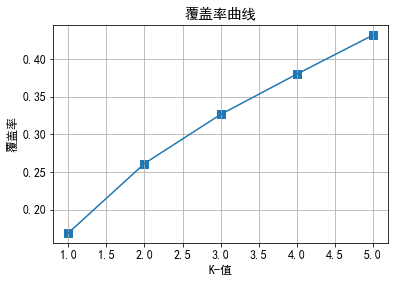

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd_candidate=pd.read_csv('candidate_1.csv')
train_data=pd.read_csv('train.csv')
news_info=pd.read_csv('news_info.csv')

article_set=[]
for col in range(5):
    tmp_article_set=set()
    for i in range(len(pd_candidate)):
        tmp_list=list(pd_candidate.iloc[i])
        if len(tmp_list)>col+1:
            tmp_article_set.add(tmp_list[col+1])
    article_set.append(tmp_article_set)

article_list=[]
article_group=train_data.groupby(['item_id'])
for i in article_group:
    article_list.append(i[0])

article_num=len(article_list)
for i in range(1,5):
    article_set[i]=article_set[i-1] | article_set[i]
    
coverage_rate=[]
for i in article_set:
    coverage_rate.append(len(i)/len(news_info))

plt.rc('font',family='SimHei',size=12)
plt.plot(range(1,6),coverage_rate)
plt.scatter(range(1,6),coverage_rate,s=80,marker='s')
plt.xlabel('K-值')
plt.ylabel('覆盖率')
plt.title('覆盖率曲线')
plt.grid()
plt.savefig('new_K-Coverage3',dpi=400)
plt.show()

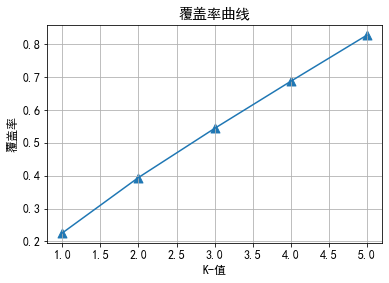

In [18]:
plt.rc('font',family='SimHei',size=12)
plt.plot(range(1,6),coverage_rate)
plt.scatter(range(1,6),coverage_rate,s=80,marker='^')
plt.xlabel('K-值')
plt.ylabel('覆盖率')
plt.title('覆盖率曲线')
plt.grid()
plt.savefig('new_K-Coverage2',dpi=400)
plt.show()

In [89]:
import seaborn as sns
pd_candidate=pd.read_csv('new_candidate.csv')
article_set=[]
dict_cate={}
df_article=pd.DataFrame(train_data,columns=['item_id','cate_id'])
item_list=list(df_article['item_id'])
cate_list=list(df_article['cate_id'])
dict_article={}
article_num=len(df_article)
for i in range(article_num):
    dict_article[item_list[i]]=cate_list[i]
    if cate_list[i]not in dict_cate.keys():
        dict_cate[cate_list[i]]=0
    dict_cate[cate_list[i]]+=1
dict_cate=dict(sorted(dict_cate.items(),key=lambda x:x[1],reverse=True))
plt.subplots(figsize=(20,12))
sns.barplot(x=list(dict_cate.keys()), y=list(dict_cate.values()),alpha=0.8, color='red')
plt.ylabel('cate_id_num', fontsize=16)
plt.xlabel('cate_id', fontsize=16)
plt.savefig('candidate_cate_id_num',dpi=400)
plt.show()